In [1]:
import pandas as pd
import os
from nameparser import HumanName
import matplotlib.pyplot as plt

In [2]:
# folder path
dir_path = r'/Users/aronvz/Library/CloudStorage/OneDrive-Personal/github/rep_maipu_sal/files/Municipal/'

# list to store files
res = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        if path != None and 'csv' in path:
            res.append(path)
#print(res)
filenames = res


In [3]:
filenames

['10_Oct.csv',
 '09_Sep.csv',
 '04_Abr.csv',
 '11_Nov.csv',
 '03_Mar.csv',
 '02_Feb.csv',
 '12_Dic.csv',
 '08_Ago.csv',
 '05_May.csv',
 '06_Jun.csv',
 '01_Ene.csv',
 '07_Jul.csv']

In [4]:
#filenames = ['file1.txt', 'file2.txt', ...]
with open(dir_path+'file.csv', 'w') as outfile:
    header = True
    hdet = "Cargo con jornada"
    for fname in filenames:
        with open(dir_path+fname, encoding='ISO-8859-1') as infile:
            for line in infile:
                if header:
                    if line != None and hdet in line:
                        header = False
                        outfile.write(line)
                else:
                    if line != None and hdet not in line:
                        outfile.write(line)

In [5]:
folder_path = '/Users/aronvz/Library/CloudStorage/OneDrive-Personal/github/rep_maipu_sal/files/Municipal/'

In [6]:
df = pd.read_csv(folder_path + 'file.csv', sep=";")

In [7]:
column_names = df.columns.tolist()
#column_names


In [8]:
df.rename(
    columns={
    'Año': 'anno', 
    'Mes': 'mes', 
    'Estamento': 'estamento', 
    'Nombre completo': 'nombre', 
    'Cargo o función': 'funcion', 
    'Grado EUS / Cargo con jornada': 'grado_c_jornada', 
    'Calificación profesional o formación': 'califica_prof', 
    'Región': 'region', 
    'Asignaciones especiales': 'asignacion_es', 
    'Unidad monetaria': 'un_monetaria', 
    'Remuneración bruta mensualizada': 'rem_bruta', 
    'Remuneración líquida mensualizada': 'rem_liquida', 
    'Montos y horas extraordinarias diurnas': 'horas_ex_diurnas', 
    'Montos y horas extraordinarias nocturnas': 'horas_ex_nocturnas', 
    'Montos y horas extraordinarias festivas': 'horas_ex_festivas', 
    'Fecha de inicio dd/mm/aa': 'fecha_inicio', 
    'Fecha de término dd/mm/aa': 'fecha_termino', 
    'Declaración de intereses y patrimonio (publicación por buena práctica)': 'declara_interes',
    'Viáticos': 'viatico', 
    'Observaciones': 'obs' }, inplace=True)

In [11]:
df['rem_liquida'] = df['rem_liquida'].str.replace('.', '')
df['rem_liquida'] = df['rem_liquida'].astype(int)

In [17]:
# Assuming your DataFrame is named 'df'

filtered_df = df[df['nombre'] == 'ACEVEDO VILLEGAS, SALVADOR CARLOS']

filtered_columns = ['rem_liquida', 'nombre', 'name', 'family_name']
filtered_df = filtered_df[filtered_columns]



print(filtered_df)

      rem_liquida                             nombre      name  \
0         3622386  ACEVEDO VILLEGAS, SALVADOR CARLOS  SALVADOR   
298       2752362  ACEVEDO VILLEGAS, SALVADOR CARLOS  SALVADOR   
595       3268726  ACEVEDO VILLEGAS, SALVADOR CARLOS  SALVADOR   
841       2790354  ACEVEDO VILLEGAS, SALVADOR CARLOS  SALVADOR   
1135      1721884  ACEVEDO VILLEGAS, SALVADOR CARLOS  SALVADOR   
1370      1977413  ACEVEDO VILLEGAS, SALVADOR CARLOS  SALVADOR   
1599      3730104  ACEVEDO VILLEGAS, SALVADOR CARLOS  SALVADOR   
1896      2879950  ACEVEDO VILLEGAS, SALVADOR CARLOS  SALVADOR   
2178      3841130  ACEVEDO VILLEGAS, SALVADOR CARLOS  SALVADOR   
2443      2950224  ACEVEDO VILLEGAS, SALVADOR CARLOS  SALVADOR   
2696      2079908  ACEVEDO VILLEGAS, SALVADOR CARLOS  SALVADOR   
2921      3930113  ACEVEDO VILLEGAS, SALVADOR CARLOS  SALVADOR   

           family_name  
0     ACEVEDO VILLEGAS  
298   ACEVEDO VILLEGAS  
595   ACEVEDO VILLEGAS  
841   ACEVEDO VILLEGAS  
1135  ACEVEDO VI

In [21]:
# Convert 'rem_liquida' column to numeric
filtered_df['rem_liquida'] = filtered_df['rem_liquida'].str.replace('.', '').astype(int)

# Calculate the mean of 'rem_liquida' grouped by 'nombre'
rem_liquida_avg = filtered_df.groupby('nombre')['rem_liquida'].mean().reset_index()

# Print the resulting DataFrame
print(rem_liquida_avg)

AttributeError: Can only use .str accessor with string values!

In [20]:
rem_liquida_avg = filtered_df.groupby('nombre')['rem_liquida'].mean().reset_index()
#rem_liquida_avg_sorted = rem_liquida_avg.sort_values('rem_liquida', ascending=False)
#rem_liquida_avg_sorted.reset_index(drop=True, inplace=True)
rem_liquida_avg = rem_liquida_avg.astype(int)
rem_liquida_avg

ValueError: invalid literal for int() with base 10: 'ACEVEDO VILLEGAS, SALVADOR CARLOS'

In [13]:
df['name'] = df['nombre'].apply(lambda x: HumanName(x).first)
df['family_name'] = df['nombre'].apply(lambda x: HumanName(x).last)

print(df[['name', 'family_name']])

           name        family_name
0      SALVADOR   ACEVEDO VILLEGAS
1        MANUEL     AGUILERA RAMOS
2        XIMENA     AGUILERA URIBE
3     FRANCISCO  AGUIRRE BALMACEDA
4       RICARDO   AGUIRRE SANTIAGO
...         ...                ...
3189       JOSE   VILLALOBOS SALAS
3190      PAULA    VILLENA VILLENA
3191     NISHME       ZAFE BASTIAS
3192      VANIA  ZAMORANO CARRASCO
3193    JAVIERA     ZUÑIGA MORALES

[3194 rows x 2 columns]


In [14]:
df

,anno,mes,estamento,nombre,funcion,grado_c_jornada,califica_prof,region,asignacion_es,un_monetaria,...,horas_ex_nocturnas,horas_ex_festivas,fecha_inicio,fecha_termino,declara_interes,viatico,obs,Unnamed: 20,name,family_name
0,2022,Octubre,Profesional,"ACEVEDO VILLEGAS, SALVADOR CARLOS",COORDINADOR DPTO. ALUMBARDO PUBLICO,9,INGENIERO EN ELECTRICIDAD Y AUTOMATIZACIÓN IND...,Región Metropolitana de Santiago,(153)(150)(42)(33),Pesos,...,"$1.167.419 : 86,00hrs",No tiene,01/10/2016,31/12/2022,No publica,No informa,Sin Observaciones,NaN,SALVADOR,ACEVEDO VILLEGAS
1,2022,Octubre,Técnico,"AGUILERA RAMOS, MANUEL ALEJANDRO",COORDINADOR DE FERIAS Y B.N.U.P. DIRECCION DE ...,10,TÉCNICO NIVEL SUPERIOR EN ACTIVIDAD FISICA Y D...,Región Metropolitana de Santiago,(150)(32)(42)(33),Pesos,...,"$224.608 : 30,00hrs",No tiene,01/07/2019,31/12/2022,No publica,No informa,Sin Observaciones,NaN,MANUEL,AGUILERA RAMOS
2,2022,Octubre,Administrativo,"AGUILERA URIBE, XIMENA DEL CARMEN",SECRETARIA DPTO.PROYECTOS Y CONSTRUCCION SMAPA,11,ENSEÑANZA MEDIA,Región Metropolitana de Santiago,(150)(32)(42)(33),Pesos,...,"$206.469 : 33,00hrs",No tiene,01/10/2017,31/12/2022,No publica,No informa,Sin Observaciones,NaN,XIMENA,AGUILERA URIBE
3,2022,Octubre,Profesional,"AGUIRRE BALMACEDA, FRANCISCO JAVIER",CERTIFICAR FIRMAS DE LA MAGISTRADO EN INGRESO ...,7,ADMINISTRADOR PÚBLICO,Región Metropolitana de Santiago,(153)(150)(32)(42)(33),Pesos,...,No tiene,No tiene,07/10/2021,31/12/2022,No publica,No informa,Sin Observaciones,NaN,FRANCISCO,AGUIRRE BALMACEDA
4,2022,Octubre,Profesional,"AGUIRRE SANTIAGO, RICARDO ISMAEL",ASESOR DPTO. CONTROL INTERNO SMAPA,7,PROFESOR DE HISTORIA Y GEOGRAFIA,Región Metropolitana de Santiago,(153)(150)(32)(42)(33),Pesos,...,"$104.683 : 8,00hrs",No tiene,01/04/2018,31/12/2022,No publica,No informa,Sin Observaciones,NaN,RICARDO,AGUIRRE SANTIAGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,2022,Julio,Técnico,"VILLALOBOS SALAS, JOSE MIGUEL",INSPECTOR MUNICIPAL,13,TEC NIVEL SUP EN PREVENCION E INVESTIGAC,Región Metropolitana de Santiago,(150)(42)(33),Pesos,...,"$226.447 : 51,00hrs",No tiene,11/09/2019,31/12/2022,No publica,No informa,Sin Observaciones,NaN,JOSE,VILLALOBOS SALAS
3190,2022,Julio,Técnico,"VILLENA VILLENA, PAULA ANDREA",COORDINADORA DPTO. DE ADQUISICIONES DIR. ADMIN...,10,TÉCNICO CONTROL INDUSTRIAL,Región Metropolitana de Santiago,(150)(32)(42)(33),Pesos,...,"$74.869 : 10,00hrs",No tiene,16/08/2016,31/12/2022,No publica,No informa,Sin Observaciones,NaN,PAULA,VILLENA VILLENA
3191,2022,Julio,Profesional,"ZAFE BASTIAS, NISHME MANAL",COORDINADORA DPTO. INCLUSION SOCIAL,8,PERIODISTA,Región Metropolitana de Santiago,(153)(150)(32)(42),Pesos,...,No tiene,No tiene,21/03/2022,31/12/2022,No publica,No informa,Sin Observaciones,NaN,NISHME,ZAFE BASTIAS
3192,2022,Julio,Profesional,"ZAMORANO CARRASCO, VANIA PAMELA",COORDINADORA DE RELACIONES PUBLICAS,8,PERIODISTA,Región Metropolitana de Santiago,(153)(150)(32)(42),Pesos,...,No tiene,No tiene,19/07/2021,31/12/2022,No publica,No informa,Sin Observaciones,NaN,VANIA,ZAMORANO CARRASCO


In [15]:
rem_liquida_avg = df.groupby('nombre')['rem_liquida'].mean().reset_index()
#rem_liquida_avg_sorted = rem_liquida_avg.sort_values('rem_liquida', ascending=False)
#rem_liquida_avg_sorted.reset_index(drop=True, inplace=True)
rem_liquida_avg

,nombre,rem_liquida
0,"ACEVEDO VILLEGAS, SALVADOR CARLOS",2.962046e+06
1,"AGUILERA RAMOS, MANUEL ALEJANDRO",1.641595e+06
2,"AGUILERA URIBE, XIMENA DEL CARMEN",1.379418e+06
3,"AGUIRRE BALMACEDA, FRANCISCO JAVIER",2.514675e+06
4,"AGUIRRE CATALAN, CARLOS ALEJANDRO",2.356496e+06
...,...,...
351,"VILLENA VILLENA, PAULA ANDREA",1.499217e+06
352,"ZAFE BASTIAS, NISHME MANAL",2.148491e+06
353,"ZAMORANO CARRASCO, VANIA PAMELA",2.114818e+06
354,"ZUÑIGA MORALES, JAVIERA ELIZABETH",1.800601e+06


In [16]:
 df[df['nombre'] == 'ACEVEDO VILLEGAS, SALVADOR CARLOS']

,anno,mes,estamento,nombre,funcion,grado_c_jornada,califica_prof,region,asignacion_es,un_monetaria,...,horas_ex_nocturnas,horas_ex_festivas,fecha_inicio,fecha_termino,declara_interes,viatico,obs,Unnamed: 20,name,family_name
0,2022,Octubre,Profesional,"ACEVEDO VILLEGAS, SALVADOR CARLOS",COORDINADOR DPTO. ALUMBARDO PUBLICO,9,INGENIERO EN ELECTRICIDAD Y AUTOMATIZACIÓN IND...,Región Metropolitana de Santiago,(153)(150)(42)(33),Pesos,...,"$1.167.419 : 86,00hrs",No tiene,01/10/2016,31/12/2022,No publica,No informa,Sin Observaciones,NaN,SALVADOR,ACEVEDO VILLEGAS
298,2022,Septiembre,Profesional,"ACEVEDO VILLEGAS, SALVADOR CARLOS",COORDINADOR DPTO. ALUMBARDO PUBLICO,9,INGENIERO EN ELECTRICIDAD Y AUTOMATIZACIÓN IND...,Región Metropolitana de Santiago,(153)(33),Pesos,...,"$1.058.822 : 78,00hrs",No tiene,01/10/2016,31/12/2022,No publica,No informa,Sin Observaciones,NaN,SALVADOR,ACEVEDO VILLEGAS
595,2022,Abril,Profesional,"ACEVEDO VILLEGAS, SALVADOR CARLOS",ENCARGADO DPTO. ALUMBRADO PUBLICO,9,INGENIERO EN ELECTRICIDAD Y AUTOMATIZACIÓN IND...,Región Metropolitana de Santiago,(153)(33),Pesos,...,"$1.045.247 : 77,00hrs",No tiene,01/10/2016,31/12/2022,No publica,No informa,Sin Observaciones,NaN,SALVADOR,ACEVEDO VILLEGAS
841,2022,Noviembre,Profesional,"ACEVEDO VILLEGAS, SALVADOR CARLOS",COORDINADOR DPTO. ALUMBARDO PUBLICO,9,INGENIERO EN ELECTRICIDAD Y AUTOMATIZACIÓN IND...,Región Metropolitana de Santiago,(153)(33),Pesos,...,"$1.316.740 : 97,00hrs",No tiene,01/10/2016,31/12/2022,No publica,No informa,Sin Observaciones,NaN,SALVADOR,ACEVEDO VILLEGAS
1135,2022,Marzo,Técnico,"ACEVEDO VILLEGAS, SALVADOR CARLOS",ENCARGADO DPTO. ALUMBRADO PUBLICO,10,INGENIERO EN ELECTRICIDAD Y AUTOMATIZACIÓN IND...,Región Metropolitana de Santiago,(33),Pesos,...,"$628.902 : 56,00hrs",No tiene,01/10/2016,31/12/2022,No publica,No informa,Sin Observaciones,NaN,SALVADOR,ACEVEDO VILLEGAS
1370,2022,Febrero,Técnico,"ACEVEDO VILLEGAS, SALVADOR CARLOS",ENCARGADO DPTO. ALUMBRADO PUBLICO,10,INGENIERO EN ELECTRICIDAD Y AUTOMATIZACIÓN IND...,Región Metropolitana de Santiago,(33),Pesos,...,"$1.044.426 : 93,00hrs",No tiene,01/10/2016,31/12/2022,No publica,No informa,Sin Observaciones,NaN,SALVADOR,ACEVEDO VILLEGAS
1599,2022,Diciembre,Profesional,"ACEVEDO VILLEGAS, SALVADOR CARLOS",COORDINADOR DPTO. ALUMBARDO PUBLICO,9,INGENIERO EN ELECTRICIDAD Y AUTOMATIZACIÓN IND...,Región Metropolitana de Santiago,(153)(150)(32)(42)(33),Pesos,...,"$1.031.673 : 76,00hrs",No tiene,01/10/2016,Indefinido,No publica,No informa,Sin Observaciones,NaN,SALVADOR,ACEVEDO VILLEGAS
1896,2022,Agosto,Profesional,"ACEVEDO VILLEGAS, SALVADOR CARLOS",COORDINADOR DPTO. ALUMBARDO PUBLICO,9,INGENIERO EN ELECTRICIDAD Y AUTOMATIZACIÓN IND...,Región Metropolitana de Santiago,(153)(33),Pesos,...,"$1.289.591 : 95,00hrs",No tiene,01/10/2016,31/12/2022,No publica,No informa,Sin Observaciones,NaN,SALVADOR,ACEVEDO VILLEGAS
2178,2022,Mayo,Profesional,"ACEVEDO VILLEGAS, SALVADOR CARLOS",ENCARGADO DPTO. ALUMBRADO PUBLICO,9,INGENIERO EN ELECTRICIDAD Y AUTOMATIZACIÓN IND...,Región Metropolitana de Santiago,(153)(150)(32)(42)(33),Pesos,...,"$1.126.695 : 83,00hrs",No tiene,01/10/2016,31/12/2022,No publica,No informa,Sin Observaciones,NaN,SALVADOR,ACEVEDO VILLEGAS
2443,2022,Junio,Profesional,"ACEVEDO VILLEGAS, SALVADOR CARLOS",COORDINADOR DPTO. ALUMBARDO PUBLICO,9,INGENIERO EN ELECTRICIDAD Y AUTOMATIZACIÓN IND...,Región Metropolitana de Santiago,(153)(33),Pesos,...,"$1.180.994 : 87,00hrs",No tiene,01/10/2016,31/12/2022,No publica,No informa,Sin Observaciones,NaN,SALVADOR,ACEVEDO VILLEGAS


In [44]:
rem_liquida_avg

,nombre,rem_liquida
0,"ACEVEDO VILLEGAS, SALVADOR CARLOS",2.962046e+06
1,"AGUILERA RAMOS, MANUEL ALEJANDRO",1.641595e+06
2,"AGUILERA URIBE, XIMENA DEL CARMEN",1.379418e+06
3,"AGUIRRE BALMACEDA, FRANCISCO JAVIER",2.514675e+06
4,"AGUIRRE CATALAN, CARLOS ALEJANDRO",2.356496e+06
...,...,...
351,"VILLENA VILLENA, PAULA ANDREA",1.499217e+06
352,"ZAFE BASTIAS, NISHME MANAL",2.148491e+06
353,"ZAMORANO CARRASCO, VANIA PAMELA",2.114818e+06
354,"ZUÑIGA MORALES, JAVIERA ELIZABETH",1.800601e+06


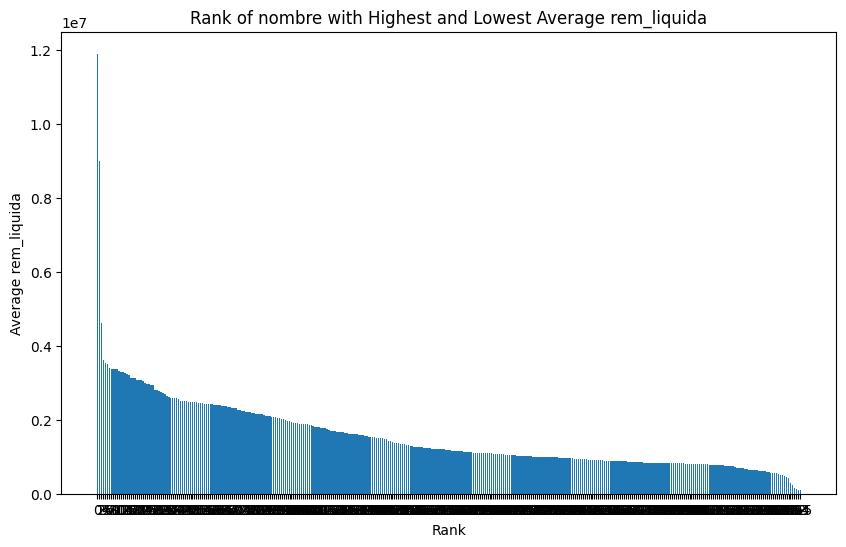

In [43]:


plt.figure(figsize=(10, 6))
plt.bar(rem_liquida_avg_sorted.index, rem_liquida_avg_sorted['rem_liquida'])
plt.xlabel('Rank')
plt.ylabel('Average rem_liquida')
plt.title('Rank of nombre with Highest and Lowest Average rem_liquida')
plt.xticks(rem_liquida_avg_sorted.index)
plt.show()


In [ ]:
from nameparser import HumanName
import pandas as pd

# Assuming the column is stored in a DataFrame named df
df = pd.DataFrame({'col1': ['urriola federico', 'carlos soto', 'gutierras juan esteban', 'rebolledo andres', 'andres carlos gamboa']})

# Extracting first name and last name using nameparser
df['name'] = df['col1'].apply(lambda x: HumanName(x).first)
df['family_name'] = df['col1'].apply(lambda x: HumanName(x).last)

# Printing the result
print(df[['name', 'family_name']])

In [ ]:
from nameparser import HumanName
import pandas as pd

# Assuming the column is stored in a DataFrame named df
df = pd.DataFrame({'col1': ['urriola federico', 'carlos soto', 'gutierras juan esteban', 'rebolledo andres', 'andres carlos gamboa']})

# Extracting first name and last name using nameparser
df['name'] = df['col1'].apply(lambda x: HumanName(x).first)
df['family_name'] = df['col1'].apply(lambda x: HumanName(x).last)

# Printing the result
print(df[['name', 'family_name']])